# Implementation of the code for PSO and GA 

##  References

####  Deap Library

https://anaconda.org/conda-forge/deap

Examples:

    https://deap.readthedocs.io/en/master/examples/ga_onemax_short.html#one-max-problem-short-version
    https://deap.readthedocs.io/en/master/examples/pso_basic.html

## Part I: PSO

### Importing libraries

In [78]:
import operator
import random
import numpy
import networkx
import array
from deap.tools import History


from deap import base, benchmarks, creator, tools, algorithms, cma

import matplotlib.pyplot as plt

Goal of the particle is to maximize its values at that location

#### Creating Fitness max function and defining particle

Weights are defined to be 1 to maximize the fitness values of the particles. There are different arguments required for creating a list of particles like fitness minimum and maximum speed and reference to the copy of the best state achieved. None values are defined here which will be updated in the next section.

In [85]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
toolbox = base.Toolbox()

creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, speed_min=None, speed_max=None, best=None)

/home/mohit/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/mohit/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Three main operator in any PSO algorithms are initializer, updater and evaluator. During initialization random position and speed are generated for a particle.

In [86]:
def generate(size, position_min, position_max, speed_min, speed_max):
    part = creator.Particle(random.uniform(position_min, position_max) for _ in range(size)) 
    part.speed = [random.uniform(speed_min, speed_max) for _ in range(size)]
    part.speed_min = speed_min
    part.speed_max = speed_max
    return part


Update program starts with computing speed and then limit them into the desired values. 

In [87]:
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part))
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part))
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if speed < part.speed_min:
            part.speed[i] = part.speed_min
        elif speed > part.speed_max:
            part.speed[i] = part.speed_max
    part[:] = list(map(operator.add, part, part.speed))


Defining the main program:

In [88]:
def main():
    pop = toolbox.population(n=300)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("average", numpy.mean)
    stats.register("standard deviation", numpy.std)
    stats.register("minimum", numpy.min)
    stats.register("maximum", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    GEN = 40
    best = None

    for g in range(GEN):
        for part in pop:
            part.fitness.values = toolbox.evaluate(part)
            if not part.best or part.best.fitness < part.fitness:
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values
            if not best or best.fitness < part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
        for part in pop:
            toolbox.update(part, best)

        # Gather all the fitnesses in one list and print the stats
        logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
        print(logbook.stream)
    
    x = list(range(0, GEN))
    avg, max_, min_, std = logbook.select("average", "maximum", "mininimum", "standard deviation")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--r")
    plt.semilogy(x, min_, "-g")
    plt.grid(True)
    plt.title("blue: average, green: minimum, red: maximum")
    plt.figure()

    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()
    
    return pop, logbook, best

Minimum and maximum positions of the particles are defined in the range of [0,1] and speed in the range of [0,1]. Different evaluation functions can be called from the benchmark for our purpose. 

In [89]:
toolbox = base.Toolbox()
toolbox.register("particle", generate, size=2, position_min=0, position_max=1, speed_min=0, speed_max=1)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

### Various Benchmark Function

#### Single Objective continous

In [90]:
toolbox.register("evaluate", benchmarks.h1)

gen	evals	average  	standard deviation	minimum    	maximum 
0  	300  	0.0491087	0.0306544         	0.000525915	0.124958
1  	300  	0.165091 	0.0241049         	0.074195   	0.204364
2  	300  	0.136404 	0.0295967         	0.0554027  	0.203058
3  	300  	0.104521 	0.0338571         	0.0144412  	0.170023
4  	300  	0.104134 	0.034469          	0.0144412  	0.166029
5  	300  	0.103876 	0.0341564         	0.0144412  	0.163319
6  	300  	0.103876 	0.0341564         	0.0144412  	0.163319
7  	300  	0.103876 	0.0341564         	0.0144412  	0.163319
8  	300  	0.103876 	0.0341564         	0.0144412  	0.163319
9  	300  	0.103876 	0.0341564         	0.0144412  	0.163319
10 	300  	0.103876 	0.0341564         	0.0144412  	0.163319
11 	300  	0.103876 	0.0341564         	0.0144412  	0.163319
12 	300  	0.103876 	0.0341564         	0.0144412  	0.163319
13 	300  	0.103876 	0.0341564         	0.0144412  	0.163319
14 	300  	0.103876 	0.0341564         	0.0144412  	0.163319
15 	300  	0.103876 	0.0341564         	0

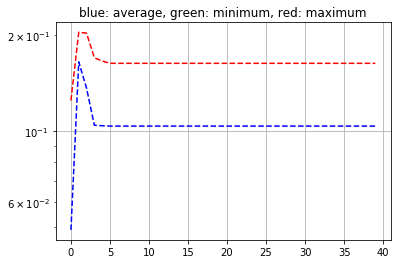

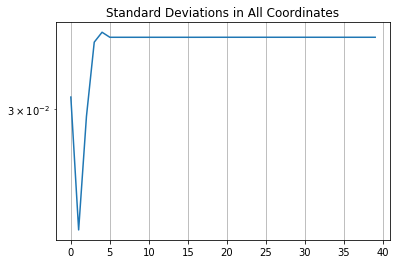

In [91]:
if __name__ == "__main__":
    main()

In [13]:
toolbox.register("evaluate", benchmarks.sphere)

gen	evals	average	standard deviation	minimum   	maximum
0  	300  	0.69377	0.417552          	0.00268998	1.80867
1  	300  	3.47187	1.08391           	0.720966  	6.63657
2  	300  	10.1264	2.10894           	4.01563   	15.9195
3  	300  	20.9087	3.14703           	10.499    	29.2025
4  	300  	35.7352	4.16792           	21.6358   	46.4854
5  	300  	54.5759	5.19669           	36.7725   	67.7684
6  	300  	77.4176	6.2286            	55.9093   	93.0513
7  	300  	104.261	7.26297           	79.0461   	122.334
8  	300  	135.103	8.2977            	106.183   	155.617
9  	300  	169.946	9.33268           	137.32    	192.9  
10 	300  	208.789	10.3678           	172.456   	234.183
11 	300  	251.632	11.4031           	211.593   	279.466
12 	300  	298.475	12.4384           	254.73    	328.749
13 	300  	349.318	13.4739           	301.867   	382.032
14 	300  	404.161	14.5093           	353.003   	439.315
15 	300  	463.003	15.5448           	408.14    	500.598
16 	300  	525.846	16.5804           	467.277   	

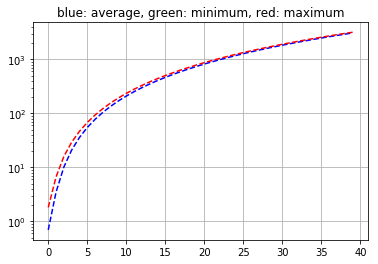

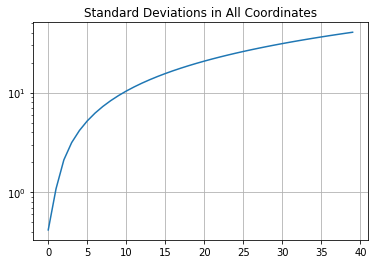

In [14]:
if __name__ == "__main__":
    main()

In [15]:
toolbox.register("evaluate", benchmarks.cigar)

gen	evals	average	standard deviation	minimum	maximum    
0  	300  	661637 	435440            	124.258	1.91649e+06
1  	300  	3.41221e+06	1.11338e+06       	728449 	6.82551e+06
2  	300  	1.01102e+07	2.13185e+06       	4.18955e+06	1.61312e+07
3  	300  	2.09147e+07	3.16221e+06       	1.00577e+07	2.93799e+07
4  	300  	3.57527e+07	4.17299e+06       	2.07883e+07	4.65717e+07
5  	300  	5.45983e+07	5.18816e+06       	3.55189e+07	6.77065e+07
6  	300  	7.74485e+07	6.20711e+06       	5.42495e+07	9.27843e+07
7  	300  	1.04297e+08	7.22485e+06       	7.69801e+07	1.21805e+08
8  	300  	1.35141e+08	8.23708e+06       	1.03711e+08	1.54769e+08
9  	300  	1.69975e+08	9.2419e+06        	1.34441e+08	1.91676e+08
10 	300  	2.08808e+08	1.0245e+07        	1.69172e+08	2.32526e+08
11 	300  	2.51634e+08	1.12426e+07       	2.07903e+08	2.77319e+08
12 	300  	2.98457e+08	1.22346e+07       	2.50633e+08	3.26055e+08
13 	300  	3.49273e+08	1.3219e+07        	2.97364e+08	3.78735e+08
14 	300  	4.0408e+08 	1.41956e+07       	3.48

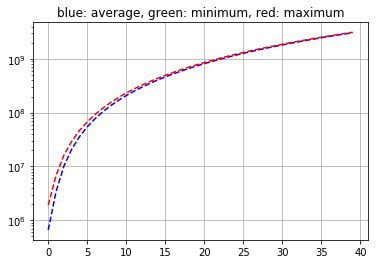

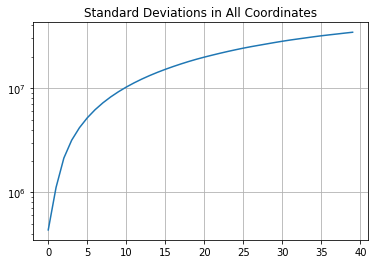

In [16]:
if __name__ == "__main__":
    main()

In [17]:
toolbox.register("evaluate", benchmarks.plane)

gen	evals	average 	standard deviation	minimum   	maximum 
0  	300  	0.481203	0.294969          	0.00426993	0.998806
1  	300  	1.29757 	0.295761          	0.206671  	1.94334 
2  	300  	2.2742  	0.318486          	1.20667   	2.94334 
3  	300  	3.27302 	0.320084          	2.20667   	3.94334 
4  	300  	4.27295 	0.31998           	3.20667   	4.94334 
5  	300  	5.27291 	0.319903          	4.20667   	5.94334 
6  	300  	6.27289 	0.319871          	5.20667   	6.94334 
7  	300  	7.27289 	0.319871          	6.20667   	7.94334 
8  	300  	8.27289 	0.319871          	7.20667   	8.94334 
9  	300  	9.27289 	0.319871          	8.20667   	9.94334 
10 	300  	10.2729 	0.319871          	9.20667   	10.9433 
11 	300  	11.2729 	0.319871          	10.2067   	11.9433 
12 	300  	12.2729 	0.319871          	11.2067   	12.9433 
13 	300  	13.2729 	0.319871          	12.2067   	13.9433 
14 	300  	14.2729 	0.319871          	13.2067   	14.9433 
15 	300  	15.2729 	0.319871          	14.2067   	15.9433 
16 	300  	16.2

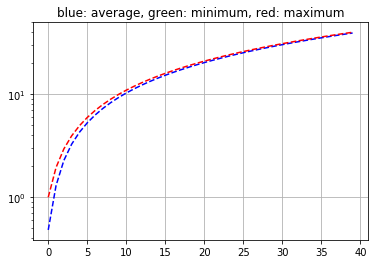

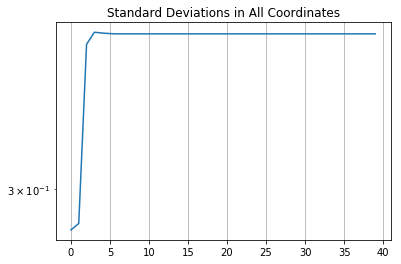

In [18]:
if __name__ == "__main__":
    main()

In [19]:
toolbox.register("evaluate", benchmarks.fonseca)

gen	evals	average 	standard deviation	minimum   	maximum 
0  	300  	0.159544	0.0992429         	0.00140789	0.473678
1  	300  	0.1628  	0.136342          	0.000919151	0.8345  
2  	300  	0.687634	0.213196          	0.000912965	0.996599
3  	300  	0.984465	0.0547618         	0.215592   	0.999993
4  	300  	0.999867	0.00154358        	0.973461   	1       
5  	300  	1       	9.4808e-07        	0.999984   	1       
6  	300  	1       	1.07576e-11       	1          	1       
7  	300  	1       	0                 	1          	1       
8  	300  	1       	0                 	1          	1       
9  	300  	1       	0                 	1          	1       
10 	300  	1       	0                 	1          	1       
11 	300  	1       	0                 	1          	1       
12 	300  	1       	0                 	1          	1       
13 	300  	1       	0                 	1          	1       
14 	300  	1       	0                 	1          	1       
15 	300  	1       	0                 	1          	1       

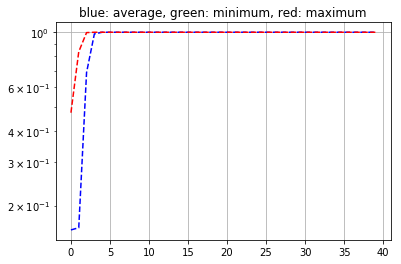

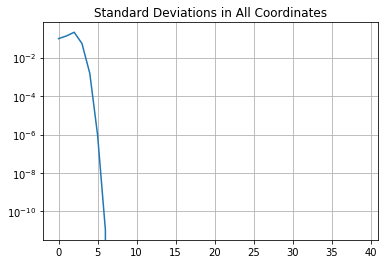

In [20]:
if __name__ == "__main__":
    main()

In [21]:
toolbox.register("evaluate", benchmarks.kursawe)

gen	evals	average 	standard deviation	minimum 	maximum 
0  	300  	-8.58981	0.47877           	-9.98137	-7.64673
1  	300  	-6.95171	0.392141          	-8.34486	-6.07624
2  	300  	-5.33592	0.348785          	-6.73052	-4.62156
3  	300  	-4.038  	0.271258          	-5.1304 	-3.48764
4  	300  	-3.04711	0.205326          	-3.89963	-2.63192
5  	300  	-2.29816	0.155126          	-2.95256	-1.98616
6  	300  	-1.73285	0.117199          	-2.23162	-1.49884
7  	300  	-1.30631	0.0885563         	-1.68518	-1.13109
8  	300  	-0.984718	0.0668476         	-1.27184	-0.853565
9  	300  	-0.742276	0.0504225         	-0.959559	-0.644136
10 	300  	-0.559505	0.0380247         	-0.723782	-0.486092
11 	300  	-0.42174 	0.0286644         	-0.545847	-0.366825
12 	300  	-0.317897	0.0216087         	-0.411606	-0.276821
13 	300  	-0.239621	0.0162932         	-0.31035 	-0.208861
14 	300  	-0.180609	0.012285          	-0.233986	-0.157406
15 	300  	-0.136123	0.00926366        	-0.176402	-0.118627
16 	300  	-0.102592	0.006

/home/mohit/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


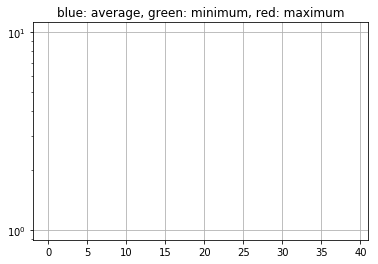

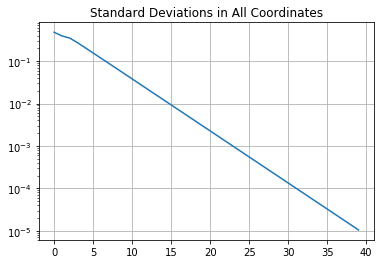

In [22]:
if __name__ == "__main__":
    main()

In [23]:
toolbox.register("evaluate", benchmarks.zdt1)

gen	evals	average 	standard deviation	minimum   	maximum 
0  	300  	0.506873	0.292849          	0.00747676	0.999438
1  	300  	1.30613 	0.303451          	0.335505  	1.90576 
2  	300  	2.26752 	0.34008           	0.904949  	2.90576 
3  	300  	3.2625  	0.354124          	1.71659   	3.90576 
4  	300  	4.2625  	0.354124          	2.71659   	4.90576 
5  	300  	5.2625  	0.354124          	3.71659   	5.90576 
6  	300  	6.2625  	0.354124          	4.71659   	6.90576 
7  	300  	7.2625  	0.354124          	5.71659   	7.90576 
8  	300  	8.2625  	0.354124          	6.71659   	8.90576 
9  	300  	9.2625  	0.354124          	7.71659   	9.90576 
10 	300  	10.2625 	0.354124          	8.71659   	10.9058 
11 	300  	11.2625 	0.354124          	9.71659   	11.9058 
12 	300  	12.2625 	0.354124          	10.7166   	12.9058 
13 	300  	13.2625 	0.354124          	11.7166   	13.9058 
14 	300  	14.2625 	0.354124          	12.7166   	14.9058 
15 	300  	15.2625 	0.354124          	13.7166   	15.9058 
16 	300  	16.2

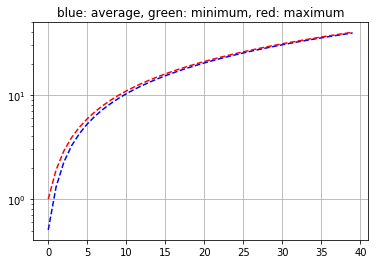

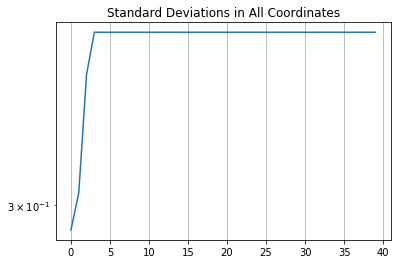

In [24]:
if __name__ == "__main__":
    main()

In [25]:
toolbox.register("evaluate", benchmarks.dent)

gen	evals	average	standard deviation	minimum	maximum
0  	300  	1.98977	0.268905          	1.30732	2.45511
1  	300  	2.65423	0.284275          	1.5461 	3.28788
2  	300  	3.55579	0.324717          	2.20375	4.21159
3  	300  	4.52972	0.325729          	3.17882	5.18056
4  	300  	5.51758	0.327961          	4.16692	6.15088
5  	300  	6.51137	0.327798          	5.15998	7.12076
6  	300  	7.50792	0.327195          	6.15543	8.09849
7  	300  	8.50513	0.326153          	7.15223	9.09602
8  	300  	9.50279	0.325477          	8.14985	10.0941
9  	300  	10.501 	0.325428          	9.14801	11.0926
10 	300  	11.4997	0.325448          	10.1465	12.0914
11 	300  	12.4985	0.325498          	11.1454	13.0904
12 	300  	13.4976	0.325536          	12.1444	14.0895
13 	300  	14.4968	0.325566          	13.1435	15.0888
14 	300  	15.4961	0.325589          	14.1428	16.0882
15 	300  	16.4956	0.325608          	15.1422	17.0876
16 	300  	17.495 	0.325624          	16.1417	18.0871
17 	300  	18.4946	0.325637          	17.1412	1

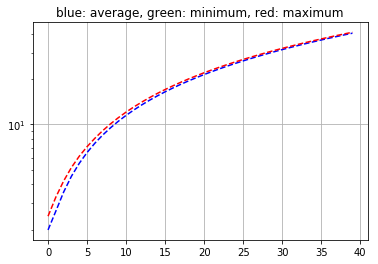

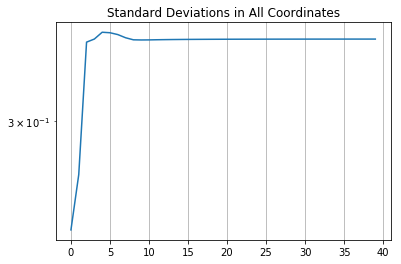

In [26]:
if __name__ == "__main__":
    main()

In [27]:
toolbox.register("evaluate", benchmarks.griewank)

gen	evals	average 	standard deviation	minimum    	maximum 
0  	300  	0.233902	0.145352          	0.000336516	0.568878
1  	300  	0.835389	0.182619          	0.299703   	1.32473 
2  	300  	1.31629 	0.212549          	0.652032   	1.95801 
3  	300  	1.49448 	0.252783          	0.636827   	1.97501 
4  	300  	1.34591 	0.197671          	0.707275   	1.80719 
5  	300  	1.32706 	0.196335          	0.707275   	1.80719 
6  	300  	1.32676 	0.196194          	0.707275   	1.80719 
7  	300  	1.32676 	0.196194          	0.707275   	1.80719 
8  	300  	1.32674 	0.196284          	0.698786   	1.80719 
9  	300  	1.32674 	0.196284          	0.698786   	1.80719 
10 	300  	1.32674 	0.196284          	0.698786   	1.80719 
11 	300  	1.32674 	0.196284          	0.698786   	1.80719 
12 	300  	1.32674 	0.196284          	0.698786   	1.80719 
13 	300  	1.32674 	0.196284          	0.698786   	1.80719 
14 	300  	1.32674 	0.196284          	0.698786   	1.80719 
15 	300  	1.32674 	0.196284          	0.698786   	1.8071

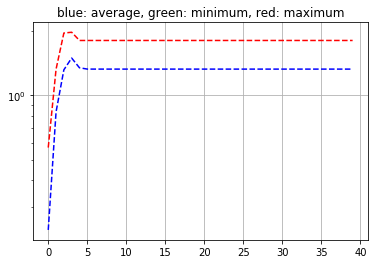

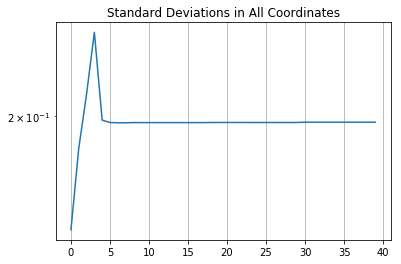

In [28]:
if __name__ == "__main__":
    main()

## Part II: Genetic Algorithm

#### Importing Library

import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

#### Defining various parameters

In [165]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attribute", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint) # With 2 point crossover 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=10)


/home/mohit/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/mohit/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### Defining Mains

##### Run this cell if you want to see the geneology tree: 

def main():
    random.seed(64)
    history = History()

    # Decorate the variation operators
    toolbox.decorate("mate", history.decorator)
    toolbox.decorate("mutate", history.decorator)
    GEN = 5
    pop = toolbox.population(n=10)
    history.update(pop)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("average", numpy.mean)
    stats.register("standard deviation", numpy.std)
    stats.register("minimum", numpy.min)
    stats.register("maximum", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=GEN, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    x = list(range(0, GEN+1))
    avg, max_, min_, std = log.select("average", "maximum", "mininimum", "standard deviation")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--r")
    plt.semilogy(x, min_, "-g")
    plt.grid(True)
    plt.title("blue: average, green: minimum, red: maximum")
    plt.figure()

    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()
    
    plt.figure()
    graph = networkx.DiGraph(history.genealogy_tree)
    graph = graph.reverse()     # Make the grah top-down
    colors = [toolbox.evaluate(history.genealogy_history[i])[0] for i in graph]
    networkx.draw(graph, node_color=colors)
    plt.show()
    
    return pop, log, hof

In [107]:
def main():
    random.seed(64)
    GEN = 40
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("average", numpy.mean)
    stats.register("standard deviation", numpy.std)
    stats.register("minimum", numpy.min)
    stats.register("maximum", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    x = list(range(0, GEN+1))
    avg, max_, min_, std = log.select("average", "maximum", "mininimum", "standard deviation")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--r")
    plt.semilogy(x, min_, "-g")
    plt.grid(True)
    plt.title("blue: average, green: minimum, red: maximum")
    plt.figure()

    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()
    
    return pop, log, hof

Tools:

https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools

History: helps to build a genealogy of all the individuals produced in the evolution

https://deap.readthedocs.io/en/master/api/tools.html#history

Plotting reference:

https://deap.readthedocs.io/en/master/examples/cmaes_plotting.html?highlight=plot

### Testing with various benchmarks

#### Single Objective continous

In [167]:
toolbox.register("evaluate", benchmarks.h1)

gen	nevals	average 	standard deviation	minimum	maximum  
0  	10    	0.038381	0.0313403         	0      	0.0643188
1  	8     	0.0643188	0                 	0.0643188	0.0643188
2  	2     	0.0643188	0                 	0.0643188	0.0643188
3  	7     	0.0643188	0                 	0.0643188	0.0643188
4  	3     	0.0643188	0                 	0.0643188	0.0643188
5  	7     	0.0643188	0                 	0.0643188	0.0643188


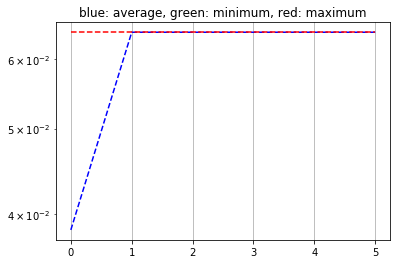

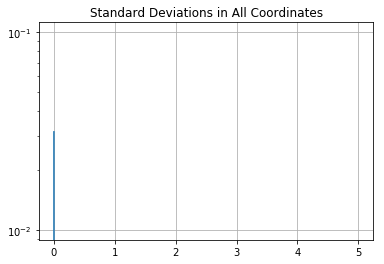

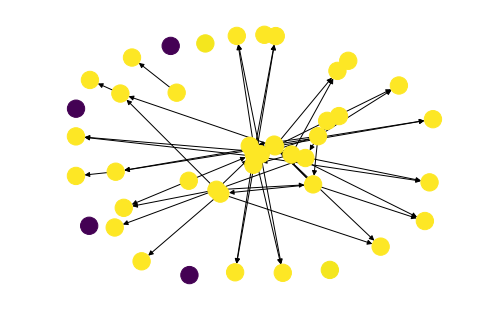

In [168]:
if __name__ == "__main__":
    main()

In [49]:
toolbox.register("evaluate", benchmarks.sphere)

gen	nevals	average 	standard deviation	minimum	maximum
0  	300   	0.996667	0.675763          	0      	2      
1  	184   	1.97667 	0.15096           	1      	2      
2  	170   	1.97    	0.189121          	0      	2      
3  	175   	1.98333 	0.128019          	1      	2      
4  	185   	1.97    	0.189121          	0      	2      
5  	163   	1.98333 	0.128019          	1      	2      
6  	189   	1.98333 	0.128019          	1      	2      
7  	187   	1.97667 	0.15096           	1      	2      
8  	199   	1.98    	0.16207           	0      	2      
9  	198   	1.98333 	0.128019          	1      	2      
10 	190   	1.98    	0.14              	1      	2      
11 	184   	1.97333 	0.161107          	1      	2      
12 	173   	1.98    	0.14              	1      	2      
13 	185   	1.99    	0.0994987         	1      	2      
14 	186   	1.99    	0.0994987         	1      	2      
15 	194   	1.98667 	0.114698          	1      	2      
16 	174   	1.98333 	0.128019          	1      	2      
17 	164   

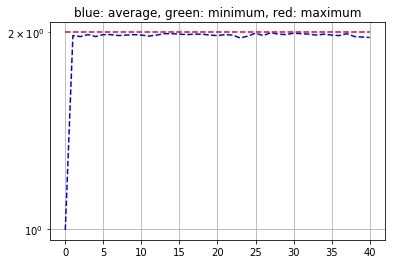

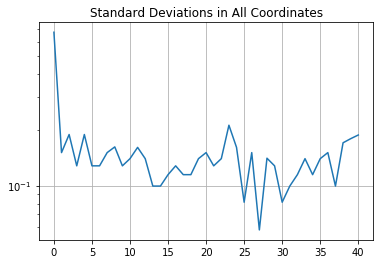

In [50]:
if __name__ == "__main__":
    main()

In [51]:
toolbox.register("evaluate", benchmarks.cigar)

gen	nevals	average	standard deviation	minimum	maximum
0  	300   	996667 	675763            	0      	2e+06  
1  	184   	1.97667e+06	150960            	1e+06  	2e+06  
2  	170   	1.97e+06   	189121            	0      	2e+06  
3  	175   	1.98333e+06	128019            	1e+06  	2e+06  
4  	185   	1.97e+06   	189121            	0      	2e+06  
5  	163   	1.98333e+06	128019            	1e+06  	2e+06  
6  	189   	1.98333e+06	128019            	1e+06  	2e+06  
7  	187   	1.97667e+06	150960            	1e+06  	2e+06  
8  	199   	1.98e+06   	162070            	0      	2e+06  
9  	198   	1.98333e+06	128019            	1e+06  	2e+06  
10 	190   	1.98e+06   	140000            	1e+06  	2e+06  
11 	184   	1.97333e+06	161107            	1e+06  	2e+06  
12 	173   	1.98e+06   	140000            	1e+06  	2e+06  
13 	185   	1.99e+06   	99498.8           	1e+06  	2e+06  
14 	186   	1.99e+06   	99498.8           	1e+06  	2e+06  
15 	194   	1.98667e+06	114698            	1e+06  	2e+06  
16 	174   	1.98333e+06

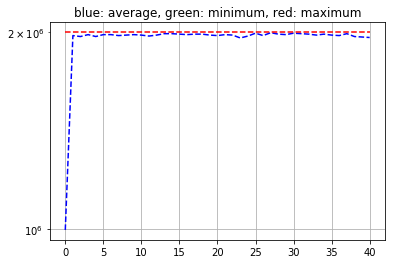

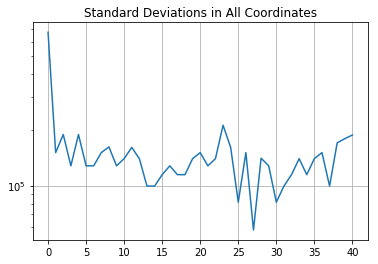

In [52]:
if __name__ == "__main__":
    main()

In [53]:
toolbox.register("evaluate", benchmarks.plane)

gen	nevals	average 	standard deviation	minimum	maximum
0  	300   	0.496667	0.499989          	0      	1      
1  	184   	0.993333	0.081377          	0      	1      
2  	170   	0.986667	0.114698          	0      	1      
3  	175   	0.996667	0.0576387         	0      	1      
4  	185   	0.99    	0.0994987         	0      	1      
5  	163   	0.99    	0.0994987         	0      	1      
6  	189   	0.99    	0.0994987         	0      	1      
7  	187   	0.983333	0.128019          	0      	1      
8  	199   	0.99    	0.0994987         	0      	1      
9  	198   	0.996667	0.0576387         	0      	1      
10 	190   	0.99    	0.0994987         	0      	1      
11 	184   	0.99    	0.0994987         	0      	1      
12 	173   	0.986667	0.114698          	0      	1      
13 	185   	0.993333	0.081377          	0      	1      
14 	186   	0.99    	0.0994987         	0      	1      
15 	194   	1       	0                 	1      	1      
16 	174   	0.986667	0.114698          	0      	1      
17 	164   

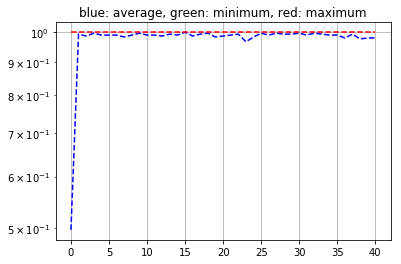

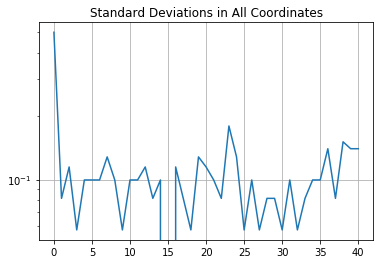

In [54]:
if __name__ == "__main__":
    main()

### Multi Objective Continous

In [55]:
toolbox.register("evaluate", benchmarks.fonseca)

gen	nevals	average 	standard deviation	minimum 	maximum 
0  	300   	0.397713	0.0629858         	0.300413	0.486583
1  	184   	0.484579	0.0129673         	0.400684	0.486583
2  	170   	0.483958	0.0167573         	0.300413	0.486583
3  	175   	0.485151	0.0109967         	0.400684	0.486583
4  	185   	0.483958	0.0167573         	0.300413	0.486583
5  	163   	0.485151	0.0109967         	0.400684	0.486583
6  	189   	0.485151	0.0109967         	0.400684	0.486583
7  	187   	0.484579	0.0129673         	0.400684	0.486583
8  	199   	0.484817	0.0145187         	0.300413	0.486583
9  	198   	0.485151	0.0109967         	0.400684	0.486583
10 	190   	0.484865	0.0120259         	0.400684	0.486583
11 	184   	0.484292	0.0138389         	0.400684	0.486583
12 	173   	0.484865	0.0120259         	0.400684	0.486583
13 	185   	0.485724	0.00854684        	0.400684	0.486583
14 	186   	0.485724	0.00854684        	0.400684	0.486583
15 	194   	0.485438	0.00985241        	0.400684	0.486583
16 	174   	0.485151	0.0109967  

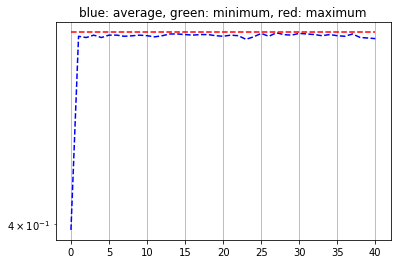

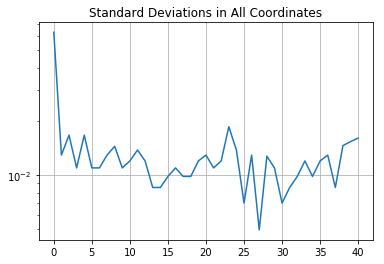

In [56]:
if __name__ == "__main__":
    main()

In [57]:
toolbox.register("evaluate", benchmarks.kursawe)

gen	nevals	average 	standard deviation	minimum	maximum 
0  	300   	-8.45668	0.882736          	-10    	-7.53638
1  	184   	-7.55157	0.0982635         	-8.18731	-7.53638
2  	170   	-7.55978	0.17196           	-10     	-7.53638
3  	175   	-7.54723	0.0833307         	-8.18731	-7.53638
4  	185   	-7.55978	0.17196           	-10     	-7.53638
5  	163   	-7.54723	0.0833307         	-8.18731	-7.53638
6  	189   	-7.54723	0.0833307         	-8.18731	-7.53638
7  	187   	-7.55157	0.0982635         	-8.18731	-7.53638
8  	199   	-7.55327	0.159986          	-10     	-7.53638
9  	198   	-7.54723	0.0833307         	-8.18731	-7.53638
10 	190   	-7.5494 	0.0911294         	-8.18731	-7.53638
11 	184   	-7.55374	0.104869          	-8.18731	-7.53638
12 	173   	-7.5494 	0.0911294         	-8.18731	-7.53638
13 	185   	-7.54289	0.0647662         	-8.18731	-7.53638
14 	186   	-7.54289	0.0647662         	-8.18731	-7.53638
15 	194   	-7.54506	0.0746595         	-8.18731	-7.53638
16 	174   	-7.54723	0.0833307    

/home/mohit/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


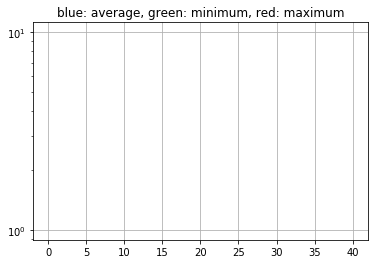

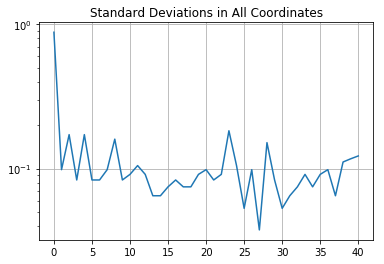

In [58]:
if __name__ == "__main__":
    main()

In [59]:
toolbox.register("evaluate", benchmarks.zdt1)

gen	nevals	average 	standard deviation	minimum	maximum
0  	300   	0.496667	0.499989          	0      	1      
1  	184   	0.993333	0.081377          	0      	1      
2  	170   	0.986667	0.114698          	0      	1      
3  	175   	0.996667	0.0576387         	0      	1      
4  	185   	0.99    	0.0994987         	0      	1      
5  	163   	0.99    	0.0994987         	0      	1      
6  	189   	0.99    	0.0994987         	0      	1      
7  	187   	0.983333	0.128019          	0      	1      
8  	199   	0.99    	0.0994987         	0      	1      
9  	198   	0.996667	0.0576387         	0      	1      
10 	190   	0.99    	0.0994987         	0      	1      
11 	184   	0.99    	0.0994987         	0      	1      
12 	173   	0.986667	0.114698          	0      	1      
13 	185   	0.993333	0.081377          	0      	1      
14 	186   	0.99    	0.0994987         	0      	1      
15 	194   	1       	0                 	1      	1      
16 	174   	0.986667	0.114698          	0      	1      
17 	164   

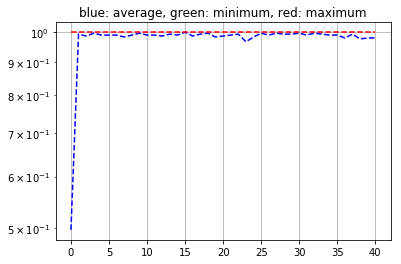

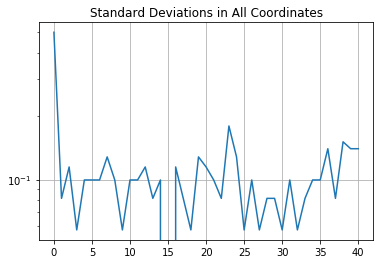

In [60]:
if __name__ == "__main__":
    main()

### Others

In [61]:
toolbox.register("evaluate", benchmarks.dent)

gen	nevals	average	standard deviation	minimum	maximum
0  	300   	1.92154	0.475327          	1.22691	2.46803
1  	184   	2.45574	0.105295          	1.22691	2.46803
2  	170   	2.45035	0.130918          	1.22691	2.46803
3  	175   	2.46068	0.076523          	1.22691	2.46803
4  	185   	2.45368	0.11093           	1.22691	2.46803
5  	163   	2.45402	0.12488           	1.22691	2.46803
6  	189   	2.45402	0.12488           	1.22691	2.46803
7  	187   	2.44574	0.159887          	1.22691	2.46803
8  	199   	2.45609	0.10857           	1.22691	2.46803
9  	198   	2.46068	0.076523          	1.22691	2.46803
10 	190   	2.45321	0.125561          	1.22691	2.46803
11 	184   	2.4516 	0.126897          	1.22691	2.46803
12 	173   	2.44988	0.143515          	1.22691	2.46803
13 	185   	2.45896	0.101885          	1.22691	2.46803
14 	186   	2.45562	0.12349           	1.22691	2.46803
15 	194   	2.46482	0.0276562         	2.22691	2.46803
16 	174   	2.45068	0.142938          	1.22691	2.46803
17 	164   	2.45815	0.102758 

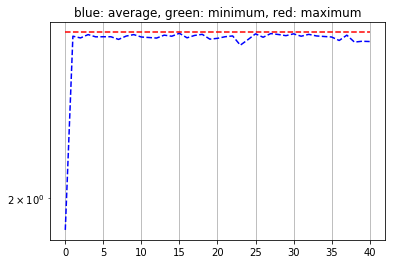

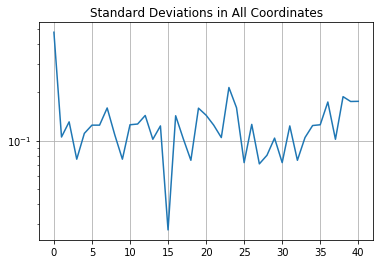

In [62]:
if __name__ == "__main__":
    main()

In [63]:
toolbox.register("evaluate", benchmarks.griewank)

gen	nevals	average 	standard deviation	minimum	maximum 
0  	300   	0.323461	0.216954          	0      	0.589738
1  	184   	0.585243	0.0328021         	0.240005	0.589738
2  	170   	0.582544	0.0505499         	0       	0.589738
3  	175   	0.586842	0.0249786         	0.240005	0.589738
4  	185   	0.583278	0.0470504         	0       	0.589738
5  	163   	0.585375	0.0362822         	0.240005	0.589738
6  	189   	0.585375	0.0362822         	0.240005	0.589738
7  	187   	0.583044	0.0458916         	0.240005	0.589738
8  	199   	0.584575	0.0453913         	0       	0.589738
9  	198   	0.586842	0.0249786         	0.240005	0.589738
10 	190   	0.584943	0.0369945         	0.240005	0.589738
11 	184   	0.584078	0.0383647         	0.240005	0.589738
12 	173   	0.58421 	0.0413833         	0.240005	0.589738
13 	185   	0.586974	0.0293927         	0.240005	0.589738
14 	186   	0.586241	0.034798          	0.240005	0.589738
15 	194   	0.588008	0.0148867         	0.459948	0.589738
16 	174   	0.584642	0.0407557    

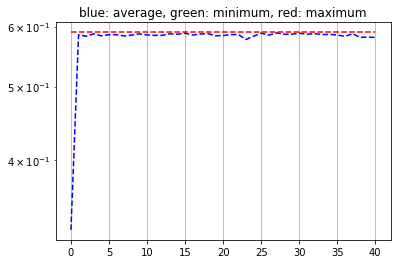

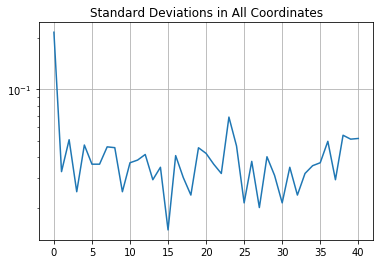

In [64]:
if __name__ == "__main__":
    main()